In [46]:
import sys
sys.path.append("..")
import torch as t
from transformers import AutoTokenizer
from lib import backprop_functions
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW
import matplotlib.pyplot as plt
device = t.device("cuda" if t.cuda.is_available() else "cpu")
import numpy as np

In [2]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)

In [28]:
magic_token_vector = backprop_functions.intialise_random_token_vector(model)
tokenizer.decode(magic_token_vector.argmax().item())

' explain'

In [40]:
input_text = "My first name is magic. My last name is"
magic_word = " magic"
target_token_id = tokenizer.encode(" Obama")[0]

tokens, magic_word_pos = backprop_functions.tokenize_input(tokenizer, input_text, magic_word)


In [41]:
losses, logs = backprop_functions.train_token_vector(model,tokens,magic_word_pos,target_token_id,magic_token_vector, lr=.01, epochs=200, l1_lambda=.1)

/root/miniconda/envs/my_env/lib/python3.9/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Progress: 100%|██████████| 200/200 [00:04<00:00, 40.86it/s, Loss=14.3, Accuracy Loss=0.255, L1 Loss=14]    


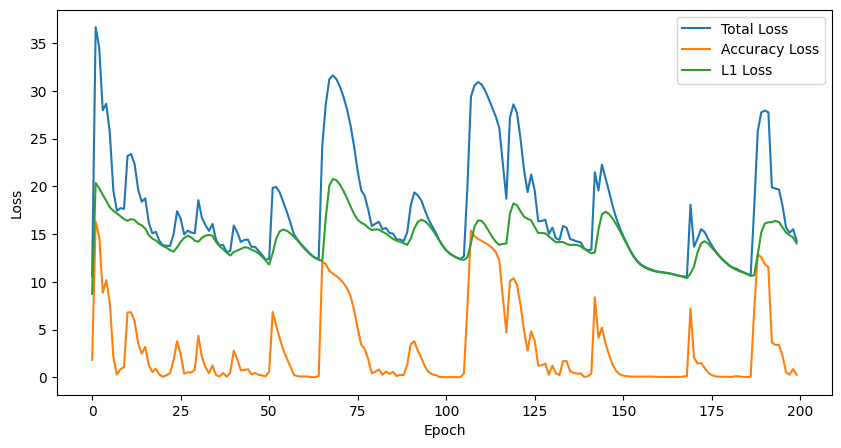

In [42]:
backprop_functions.plot_loss(losses)

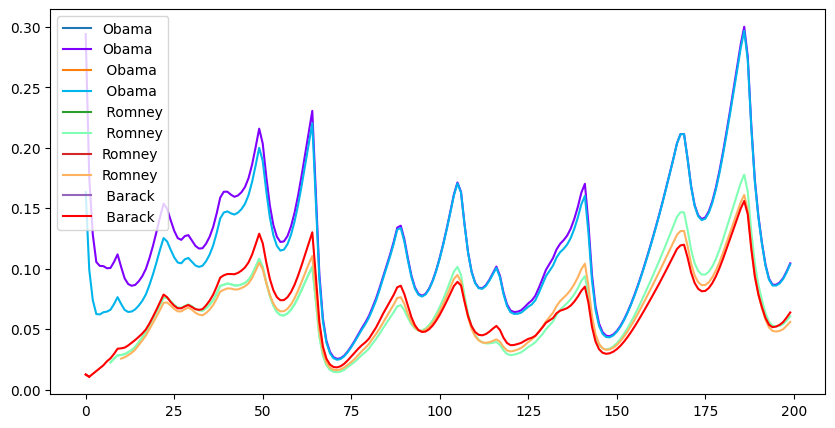

In [43]:
backprop_functions.plot_best_tokens(logs,tokenizer)

In [47]:
from backprop_functions import Loss_function
def evaluate_single_token(eval_ids, tokens, token_pos ,model,target_token):
    tokens[token_pos] = eval_ids
    tokens = t.tensor(tokens).unsqueeze(0).to(device)

    logits = model(tokens).logits

    loss, accuracy_loss, l1_loss = Loss_function(
                logits, target_token, magic_token_vector, l1_lambda=0
            )
    return accuracy_loss.item()

ModuleNotFoundError: No module named 'backprop_functions'

In [12]:
tokenizer.decode(magic_token_vector.argmax().item())


' Armstrong'

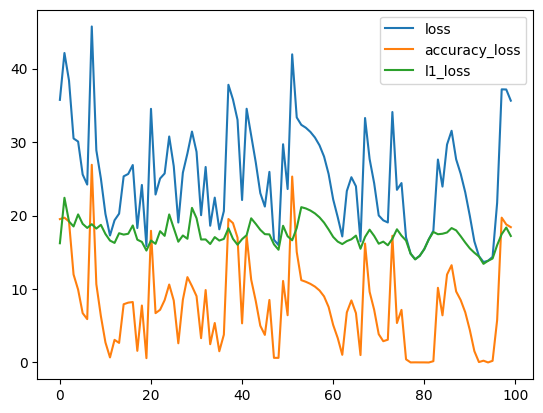

In [13]:
# plot the 3 losses
loss = losses["loss"]
accuracy_loss = losses["accuracy_loss"]
l1_loss = losses["l1_loss"]

plt.plot(loss)
plt.plot(accuracy_loss)
plt.plot(l1_loss)
plt.legend(["loss","accuracy_loss","l1_loss"])
plt.show()


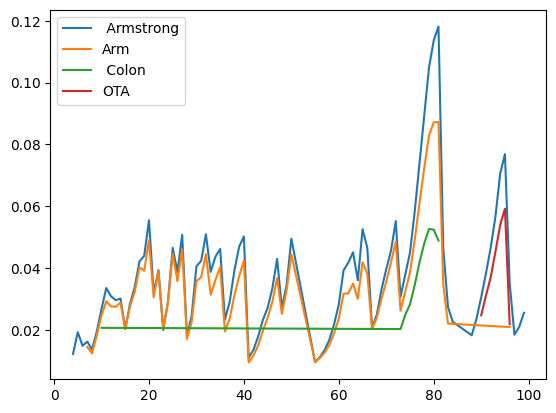

In [16]:
plot_dict = {}
max_probs = []
n_plots = 5

for word in logs.keys():
    steps = []
    probs = []

    for step, prob in logs[word]:
        steps.append(step)
        probs.append(prob)

    
    max_prob = max(probs)
    max_probs.append(max_prob)
    plot_dict[word] = (steps, probs, max_prob)

threshold = sorted(max_probs)[-n_plots]
for word in plot_dict.keys():
    steps, probs, max_prob = plot_dict[word]
    if max_prob > threshold:
        plt.plot(steps, probs, label=tokenizer.decode([word]))


plt.legend()
plt.show()